In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import tarfile
import urllib.request
seed = 42
np.random.seed = seed


from sklearn.model_selection import StratifiedShuffleSplit  
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Util functions

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
fetch_housing_data()
df = load_housing_data(HOUSING_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

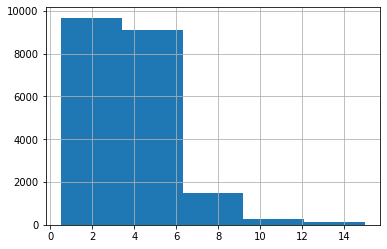

In [ ]:
df["median_income"].hist(bins=5)

In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
"""
cat_encoder = OneHotEncoder(sparse=False) # Returns compressed/dense array
cat_1hot = cat_encoder.fit_transform(df[["ocean_proximity"]])
cat_1hot  # ocean_proximity encoded
"""
cat_encoder = pd.get_dummies(data=df, columns=['ocean_proximity'])
cat_encoder

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,0,1,0,0,0


In [ ]:
df = cat_encoder

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= seed)   # test_size: represent the proportion of the dataset to include in the test split.
for train_index, test_index in sss.split(df, df["income_cat"]):    # .split() Generates indices to split data into training and test set.
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

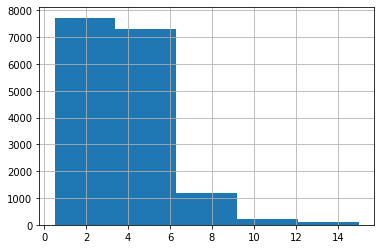

In [ ]:
df_train['median_income'].hist(bins=5)

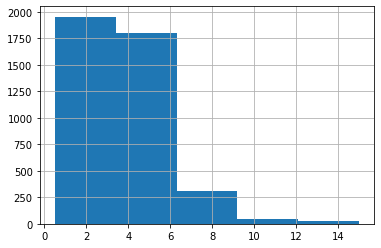

In [ ]:
df_test['median_income'].hist(bins=5)

In [ ]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_train.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
y_train = df_train['median_house_value'].values
y_test = df_test['median_house_value'].values

df_train = df_train.drop(['median_house_value'], axis=1)
df_test = df_test.drop(['median_house_value'], axis=1)
X_train = df_train.values
X_test = df_test.values


In [ ]:
X_train.shape
features = df_train.columns

In [ ]:
data_norm_filter = MinMaxScaler()
X_train_norm = data_norm_filter.fit_transform(X_train)
X_test_norm = data_norm_filter.transform(X_test)

print(X_train_norm[0,:])

[0.28784861 0.63549416 0.54901961 0.09836191 0.12806057 0.06261386
 0.13144137 0.11542599 0.25       0.         1.         0.
 0.         0.        ]


In [ ]:
'''
label_norm_filter = MinMaxScaler()
y_train_norm = label_norm_filter.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_norm = label_norm_filter.transform(y_test.reshape(-1, 1)).flatten()
print(y_train_norm[:5])
'''

y_train_norm = y_train/500001.0
y_test_norm = y_test/500001.0





In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_norm, y_train_norm)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test_norm)

In [ ]:
df_plot = pd.DataFrame({'value':y_test, 'prediction':y_pred})
df_plot.head(10)

,value,prediction
0,500001.0,0.832887
1,162500.0,0.589882
2,204600.0,0.485176
3,159700.0,0.396713
4,184000.0,0.522198
5,151900.0,0.437175
6,104900.0,0.305837
7,500001.0,0.740505
8,367400.0,0.571987
9,346500.0,0.459666


In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

235743.97824214233

In [ ]:
coef = lr_model.coef_
for i in range(len(features)):
  print(f'{features[i]}: {coef[i]}')
coef

longitude: -0.5219279666144786
latitude: -0.4646036776379465
housing_median_age: 0.11598164966217761
total_rooms: -0.4931129764423576
total_bedrooms: 0.9973845283862346
population: -2.7467241823788746
households: 0.8025522541135178
median_income: 0.9728545872967256
income_cat: 0.09108483428572646
ocean_proximity_<1H OCEAN: -0.03929653461839752
ocean_proximity_INLAND: -0.11660186227026342
ocean_proximity_ISLAND: 0.2337223646461729
ocean_proximity_NEAR BAY: -0.04774654985296978
ocean_proximity_NEAR OCEAN: -0.030077417904538155


array([-0.52192797, -0.46460368,  0.11598165, -0.49311298,  0.99738453,
       -2.74672418,  0.80255225,  0.97285459,  0.09108483, -0.03929653,
       -0.11660186,  0.23372236, -0.04774655, -0.03007742])

In [ ]:
tmp_df = df_train.copy()
tmp_df['label'] = y_train
tmp_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,label
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076335,0.108071,0.063146,-0.019615,0.318160,-0.054733,0.006436,-0.475898,0.052194,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072213,-0.115290,-0.077765,-0.075146,-0.444080,0.350742,-0.011606,0.358881,-0.167113,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.323835,-0.298737,-0.306473,-0.111315,0.048905,-0.243223,0.010369,0.258548,0.022243,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.926340,0.855103,0.918396,0.200133,0.001089,0.023986,-0.005585,-0.027584,-0.008845,0.135140
total_bedrooms,0.076335,-0.072213,-0.323835,0.926340,1.000000,0.871863,0.974529,-0.009415,0.024435,-0.009137,-0.003522,-0.026168,0.001234,0.047735
population,0.108071,-0.115290,-0.298737,0.855103,0.871863,1.000000,0.904639,0.002421,0.077911,-0.022377,-0.006498,-0.065896,-0.022142,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.974529,0.904639,1.000000,0.010869,0.048127,-0.042293,-0.005713,-0.016036,0.002781,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009415,0.002421,0.010869,1.000000,0.167555,-0.233741,-0.006686,0.054898,0.025384,0.687151
ocean_proximity_<1H OCEAN,0.318160,-0.444080,0.048905,0.001089,0.024435,0.077911,0.048127,0.167555,1.000000,-0.607095,-0.009770,-0.315029,-0.341063,0.259521
ocean_proximity_INLAND,-0.054733,0.350742,-0.243223,0.023986,-0.009137,-0.022377,-0.042293,-0.233741,-0.607095,1.000000,-0.007527,-0.242712,-0.262770,-0.482853


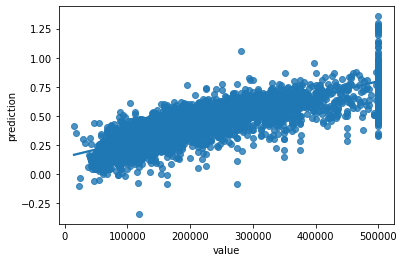

In [ ]:
sns.regplot(data=df_plot, x='value', y='prediction')

In [ ]:
r_model = Ridge(alpha=0.0001)
r_model.fit(X_train_norm, y_train_norm)

y_pred = r_model.predict(X_test_norm)

df_plot['Ridge'] = y_pred

math.sqrt(mean_squared_error(y_test, y_pred*500001))


67238.68522646793

In [ ]:
l_model = Lasso(alpha=0.00001)
l_model.fit(X_train_norm, y_train_norm)

y_pred = l_model.predict(X_test_norm)

df_plot['Lasso'] = y_pred

math.sqrt(mean_squared_error(y_test, y_pred*500001))


67263.10732846074

In [ ]:
df_plot.head()

,value,prediction,Ridge,Lasso
0,500001.0,0.832887,0.832886,0.832504
1,162500.0,0.589882,0.589881,0.589625
2,204600.0,0.485176,0.485176,0.485437
3,159700.0,0.396713,0.396714,0.397621
4,184000.0,0.522198,0.522197,0.523005


In [ ]:
df_plot['meta'] = df_plot[['prediction','Ridge','Lasso']].max(axis=1)
df_plot.head()


,value,prediction,Ridge,Lasso,meta
0,500001.0,0.832887,0.832886,0.832504,0.832887
1,162500.0,0.589882,0.589881,0.589625,0.589882
2,204600.0,0.485176,0.485176,0.485437,0.485437
3,159700.0,0.396713,0.396714,0.397621,0.397621
4,184000.0,0.522198,0.522197,0.523005,0.523005


In [ ]:
math.sqrt(mean_squared_error(y_test, df_plot['meta'].values*500001))


67226.55180630417

In [ ]:
t_model = RandomForestRegressor(n_estimators=100, max_depth=5 , random_state=seed)
t_model.fit(X_train_norm, y_train_norm)

y_pred = t_model.predict(X_test_norm)

df_plot['DTR'] = y_pred

math.sqrt(mean_squared_error(y_test, y_pred*500001))


67145.65591869917